In [10]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/NLP_TP')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#필요 패키지 설치
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 44.6 MB/s eta 0:00:00


In [64]:
#필수 라이브러리 임포트 및 정의
import importlib
import tokenizer
importlib.reload(tokenizer)
from tokenizer import CustomTokenizer

In [65]:
import os
os.getcwd()

'/content'

In [66]:
PATH_DATASET = '/content/drive/MyDrive/NLP_TP/5차년도_2차.csv'

In [67]:
import pandas as pd

df = pd.read_csv(PATH_DATASET, encoding = 'cp949')

# Label Encoding
label_map = {
    "fear": 0,
    "surprise": 1,
    "angry": 2,
    "sadness": 3,
    "neutral": 4,
    "happiness": 5,
    "disgust": 6
}

df ['감정']= df["상황"].map(label_map)


input_data = df[["발화문","감정"]]

input_data

,발화문,감정
0,헐! 나 이벤트에 당첨 됐어.,5
1,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,5
2,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",5
3,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",5
4,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,4
...,...,...
19369,나 엘리베이터에 갇혔어.,0
19370,하지만 기분이 나쁜 걸 어떡해?,2
19371,자취방 엘리베이턴데 정전인가봐.,0
19372,나 드디어 프로젝트 끝났어!,5


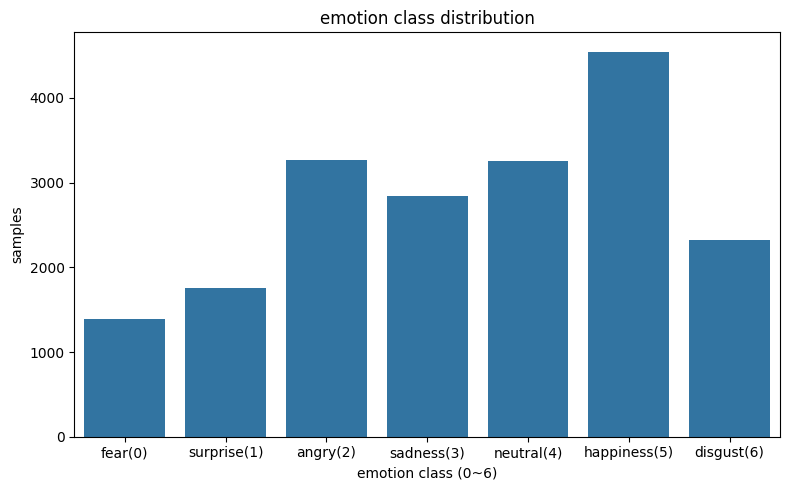

In [68]:
#데이터 EDA. 분포 확인.
import matplotlib.pyplot as plt
import seaborn as sns

# 감정별 개수 세기
emotion_counts = input_data['감정'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.xlabel("emotion class (0~6)")
plt.ylabel("samples")
plt.title("emotion class distribution")
plt.xticks(ticks=range(7), labels=[
    "fear(0)", "surprise(1)", "angry(2)",
    "sadness(3)", "neutral(4)", "happiness(5)", "disgust(6)"
])
plt.tight_layout()
plt.show()


In [69]:
from sklearn.model_selection import train_test_split

x=df['발화문']
y=df['감정']

trval_x , test_x , trval_y , test_y =train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [70]:
train_x , val_x , train_y, val_y = train_test_split(trval_x,trval_y,stratify=trval_y,test_size=0.2,random_state=42)

In [71]:
# train , val, test 잘 나뉘었는지 확인.
print(f"Train set size:      {len(train_x)}")
print(f"Validation set size: {len(val_x)}")
print(f"Test set size:       {len(test_x)}")


# stratify (클래스 불균형 고려) 하게 나뉘어졌는지.

print("Train label distribution:")
print(train_y.value_counts(normalize=True).sort_index())

print("\nValidation label distribution:")
print(val_y.value_counts(normalize=True).sort_index())

print("\nTest label distribution:")
print(test_y.value_counts(normalize=True).sort_index())


Train set size:      12399
Validation set size: 3100
Test set size:       3875
Train label distribution:
감정
0    0.071538
1    0.090572
2    0.168401
3    0.147028
4    0.167917
5    0.234696
6    0.119848
Name: proportion, dtype: float64

Validation label distribution:
감정
0    0.071613
1    0.090645
2    0.168387
3    0.147097
4    0.167742
5    0.234839
6    0.119677
Name: proportion, dtype: float64

Test label distribution:
감정
0    0.071484
1    0.090581
2    0.168516
3    0.146839
4    0.168000
5    0.234839
6    0.119742
Name: proportion, dtype: float64


In [72]:
corpus = train_x.tolist()
corpus

['아직 안 했어. 선물 오면 같이 해야지.',
 '지금 당장 벌레가 나온 짜장면을 찍어 놓을게.',
 '아니 관심은 쭉 있었는데, 요즘 많이들 하니까 나도 시작했지.',
 '신나는 음악을 들으면서 춤을 추고 싶을 정도로 기분이 너무 좋아.',
 '응. 그래야겠어. ',
 '상사면 상사답게 행동을 해야될 거 아니야. 저건 미친 놈이지, 정상은 아니야.',
 '터지면 나도 어떻게 될지 모르겠어.',
 '나 축하해줘. 기분 좋은 일이 생겼어.',
 '정전때문에 엘리베이터가 멈춘 것 같아. 나 어떡하지?',
 '나는 니가 무슨 말 하는건지 모르겠다.',
 '그래야 할 것 같아. 화장실이 너무 냄새가 나 습해서!',
 '알았어. 신나는 음악 듣고 스트레스 좀 풀을게.',
 '친구가 추천해서 샀지.',
 '어 날이 좋았지. 골목에 짭새가 완전 몰려있었다니까?',
 '그새끼는 욕을 들어도 싸.',
 '나 축하해줘.',
 '기분 좋지. 현금으로 줘서 좋아.',
 '나 드디어 프로젝트가 끝났어.',
 '분명 어제도 환기시켰는데 왜 그런걸까?',
 '방향제가 과연 효과가 있을까?',
 '그렇게 말해주니 기분이 좋구만.',
 '요즘 계속 집에만 있다보니 우울한 것 같아. 밖에 나가고 싶어.',
 '너무 화가 나고 어이가 없는데, 내 기분을 전환해줄 수 있는 영상이 있어?',
 '방향제가 없는데 어떡하지?',
 '어떻게 이런 일이 있을 수가 있죠?',
 '아니 나가려고 했는데 밖에 막 물이 막 가득 차 가지고 나갈 수가 없어!',
 '내가 버려야 되는 순간에 안 버리고 있었더니 그러는 거야.',
 '좋아하는 유튜버가 시청자에게 사과하는 영상을 올렸어.',
 '처음엔 너무 어이가 없어서 헛웃음이 나오더라고.',
 '그래. 얼마나 도대체 계속 이렇게 집 안에 있어야 될까.',
 '완전 놀랐지 진짜. 다들 소리지르고 난리 났어.',
 '나도 지금은 팔지 못해.',
 '한명만 뽑는거라니까?',
 '나 오늘 짭새가 몰려 있길래 궁금해서 구경 다녀 왔다?',
 '아니 아까 해피를 산책시키다

In [73]:
# 빈도 기반 vocab 생성 run and debug
tokenizer = CustomTokenizer(vocab_size=5000, tokenizer_type='freq')
tokenizer.train_freq(corpus)

for token, idx in tokenizer.vocab.items():
    print(f"{idx:>2} : {token}")


[train_freq] vacab 생성 완료. 총 5000개 토큰 등록.
 0 : [PAD]
 1 : [UNK]
 2 : [CLS]
 3 : [SEP]
 4 : [MASK]
 5 : 나
 6 : 너무
 7 : 내가
 8 : 것
 9 : 같아.
10 : 안
11 : 정말
12 : 거
13 : 오늘
14 : 있어.
15 : 좋은
16 : 좀
17 : 한
18 : 짭새가
19 : 많이
20 : 냄새가
21 : 엄청
22 : 구경
23 : 내
24 : 궁금해서
25 : 잘
26 : 요즘
27 : 그래.
28 : 그
29 : 다
30 : 지금
31 : 왜
32 : 없어.
33 : 곰팡이가
34 : 그냥
35 : 집
36 : 못
37 : 기분
38 : 때문에
39 : 응.
40 : 고마워.
41 : 사람들이
42 : 그런
43 : 일이
44 : 몰려
45 : 깜짝
46 : 드디어
47 : 왔어.
48 : 진짜
49 : 나도
50 : 청소를
51 : 수
52 : 더
53 : 우울해.
54 : 기분이
55 : 수가
56 : 아니
57 : 갑자기
58 : 맞아.
59 : 거야.
60 : 아
61 : 비가
62 : 알았어.
63 : 주식을
64 : 않아.
65 : 해도
66 : 다행히
67 : 쓰레기통에서
68 : 마라톤
69 : 계속
70 : 그래서
71 : 있길래
72 : 역겨운
73 : 할
74 : 없었어.
75 : 아까
76 : 있어서
77 : 괜찮아.
78 : 해피
79 : 일
80 : 모르겠어.
81 : 그렇게
82 : 나는
83 : 무슨
84 : 음악
85 : 다녀왔어.
86 : 프로젝트
87 : 좋아.
88 : 우리
89 : 혼자
90 : 어떻게
91 : 화장실은
92 : 몰려있길래
93 : 밖에
94 : 끝났어.
95 : 했어.
96 : 같애.
97 : 내일
98 : 코로나
99 : 곰팡이
100 : 벌레가
101 : 어.
102 : 같이
103 : 목줄이
104 : 신나는
105 : 놀랐어.
106 : 이벤트
107 : 나고
108 : 짜장면에서
109 : 하

In [74]:
#형태소 기반 vocab 생성.
tokenizer = CustomTokenizer(vocab_size=5000, tokenizer_type='okt')
tokenizer.train_okt(corpus)

for token, idx in tokenizer.vocab.items():
    print(f"{idx:>2} : {token}")


[train_okt] vocab 생성 완료. 총 5000개 토큰 등록.
 0 : [PAD]
 1 : [UNK]
 2 : [CLS]
 3 : [SEP]
 4 : [MASK]
 5 : .
 6 : 가
 7 : 나
 8 : 이
 9 : 에
10 : !
11 : ?
12 : 너무
13 : 을
14 : 를
15 : 내
16 : 도
17 : 것
18 : 들
19 : 안
20 : 은
21 : 집
22 : 에서
23 : 같아
24 : 거
25 : 는
26 : ,
27 : 한
28 : 있어
29 : 짭
30 : 구경
31 : 새
32 : 못
33 : 기분
34 : 했어
35 : 사람
36 : 정말
37 : 오늘
38 : 곰팡이
39 : 아니
40 : 좋은
41 : 당첨
42 : 해피
43 : 좀
44 : 냄새
45 : 그래
46 : 하고
47 : 그
48 : 주식
49 : 지금
50 : 다
51 : 만
52 : 친구
53 : 아
54 : 이야
55 : 많이
56 : 음악
57 : 하는
58 : 시작
59 : 이벤트
60 : 해
61 : 됐어
62 : 응
63 : 한테
64 : 어
65 : 요즘
66 : 했는데
67 : 엄청
68 : 때문
69 : 잘
70 : 더
71 : 거야
72 : 비
73 : 왔어
74 : 일
75 : 없어
76 : 청소
77 : 궁금해서
78 : 너
79 : 말
80 : 왜
81 : 진짜
82 : 일이
83 : 추천
84 : 그냥
85 : 고마워
86 : 뭐
87 : 생각
88 : 할
89 : 고
90 : 그런
91 : 프로젝트
92 : 마음
93 : 게
94 : 쓰레기통
95 : 서
96 : 몰려
97 : 맞아
98 : 야
99 : 해줘
100 : 깜짝
101 : 화장실
102 : 우울해
103 : 로
104 : 드디어
105 : 되었어
106 : 끝났어
107 : 벌레
108 : 나도
109 : 해도
110 : 수
111 : 않아
112 : 휴가
113 : 수가
114 : 새끼
115 : 갑자기
116 : 알았어
117 : 으로
118 : 우리
11

In [75]:
#bpe 아이디어 기반 vocab 생성.
tokenizer = CustomTokenizer(vocab_size=5000, tokenizer_type='bpe')
tokenizer.train_bpe(corpus)

for token, idx in tokenizer.vocab.items():
    print(f"{idx:>2} : {token}")

[train_bpe] vocab 생성 완료. 총 5000개 토큰 등록.
 0 : [PAD]
 1 : [UNK]
 2 : [CLS]
 3 : [SEP]
 4 : [MASK]
 5 : .</w>
 6 : 어.</w>
 7 : 가</w>
 8 : 서</w>
 9 : 이</w>
10 : 고</w>
11 : 는</w>
12 : 나</w>
13 : 도</w>
14 : 에</w>
15 : !</w>
16 : 을</w>
17 : 아.</w>
18 : ?</w>
19 : 너무
20 : 너무</w>
21 : 은</w>
22 : 데</w>
23 : 를</w>
24 : 게</w>
25 : </w>같
26 : 지</w>
27 : 로</w>
28 : 지.</w>
29 : 는데</w>
30 : 야.</w>
31 : 그래
32 : 니까
33 : 한</w>
34 : </w>있
35 : 내가</w>
36 : 아니
37 : 것</w>같
38 : 에서</w>
39 : 해.</w>
40 : 새가</w>
41 : 해서</w>
42 : ,</w>
43 : 면</w>
44 : 니까</w>
45 : 겠어.</w>
46 : 어!</w>
47 : 구경
48 : 다</w>
49 : 안</w>
50 : 왔어.</w>
51 : 고.</w>
52 : 었어.</w>
53 : 했어.</w>
54 : 만</w>
55 : 기분
56 : 히</w>
57 : 기</w>
58 : </w>좋
59 : 몰려
60 : 사람
61 : 게.</w>
62 : 다.</w>
63 : 정말
64 : 것</w>같아.</w>
65 : </w>거
66 : 어</w>
67 : 오늘
68 : 곰팡
69 : </w>수
70 : 오늘</w>
71 : </w>일
72 : </w>나
73 : 당첨
74 : 해피
75 : 쓰레
76 : 주식
77 : 정말</w>
78 : 래</w>
79 : 지금
80 : 하는</w>
81 : 그런
82 : 리</w>
83 : 들이</w>
84 : 괜찮
85 : 았어.</w>
86 : 친구
87 : 가</w>없
88 : 워.</

In [76]:
# Test Encoder/Decoder
test_text = "나는 오늘 학교에 갔다."

# encode
input_ids, attention_mask, token_type_ids = tokenizer.encode(test_text, max_length=20)
print("\n✅ encode 결과:")
print("input_ids      :", input_ids)
print("attention_mask :", attention_mask)
print("token_type_ids :", token_type_ids)

# __call__
inputs = tokenizer(test_text, max_length=20, return_tensors='pt')
print("✅ __call__() 결과:")
for k, v in inputs.items():
    print(f"{k:15}: {v}")

# decode
print("✅ decode 결과:")
print(tokenizer.decode(input_ids))



✅ encode 결과:
input_ids      : [2, 207, 70, 2160, 14, 2515, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
attention_mask : [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
token_type_ids : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
✅ __call__() 결과:
input_ids      : tensor([[   2,  207,   70, 2160,   14, 2515,    5,    3,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])
attention_mask : tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
token_type_ids : tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
✅ decode 결과:
나는 오늘 학교에 갔다.


In [77]:
# Test Embedding Layer

# Seed 고정
import random
import numpy as np
import torch
import os

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # multi-gpu

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    os.environ["PYTHONHASHSEED"] = str(seed)

set_seed(42)

In [78]:
import pandas as pd
df = pd.read_csv(PATH_DATASET, encoding="cp949")

# Label Encoding
label_map = {
    "fear": 0,
    "surprise": 1,
    "angry": 2,
    "sadness": 3,
    "neutral": 4,
    "happiness": 5,
    "disgust": 6
}
df["y"] = df["상황"].map(label_map)

x_col = '발화문'
y_col = 'y'
input_data = df[[x_col] + [y_col]]
input_data

,발화문,y
0,헐! 나 이벤트에 당첨 됐어.,5
1,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,5
2,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",5
3,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",5
4,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,4
...,...,...
19369,나 엘리베이터에 갇혔어.,0
19370,하지만 기분이 나쁜 걸 어떡해?,2
19371,자취방 엘리베이턴데 정전인가봐.,0
19372,나 드디어 프로젝트 끝났어!,5


In [79]:
# Split
from sklearn.model_selection import train_test_split
trval_X, test_X, trval_y, test_y = train_test_split(
    input_data[x_col].tolist(), input_data[y_col].tolist(),
    test_size=0.05, stratify=input_data[y_col], random_state=42)

from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(
    trval_X, trval_y, test_size=0.05, stratify=trval_y, random_state=42)

print(f"            x      y")
print(f"train size: {len(train_X):<5}  {len(train_y):<5}")
print(f"valid size: {len(valid_X):<5}  {len(valid_y):<5}")
print(f"test size : {len(test_X):<5}  {len(test_y):<5}")

            x      y
train size: 17484  17484
valid size: 921    921  
test size : 969    969  


In [80]:
custom_tokenizer = tokenizer
print("target vocab_size:", custom_tokenizer.vocab_size)

target vocab_size: 5000


In [81]:
import torch
from torch.utils.data import Dataset, DataLoader

class KoBERTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        inputs = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
            max_length=self.max_len
        )
        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [82]:
train_dataset = KoBERTDataset(train_X, train_y, custom_tokenizer)
valid_dataset = KoBERTDataset(valid_X, valid_y, custom_tokenizer)
test_dataset = KoBERTDataset(test_X, test_y, custom_tokenizer)

In [83]:
from torch.utils.data import Dataset, DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [84]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [85]:
import os

model_path = "/content/drive/MyDrive/NLP_TP/Model"
model_id = "monologg/kobert"

os.makedirs(model_path, exist_ok=True)

In [98]:
from transformers import BertModel
bert = BertModel.from_pretrained(model_id, cache_dir=model_path, trust_remote_code=True)
bert.resize_token_embeddings(custom_tokenizer.vocab_size)

Embedding(5000, 768, padding_idx=1)

In [99]:
import torch.nn as nn

class KoBERTClassifier(nn.Module):
    def __init__(self, bert, num_classes, hidden_size=768, dropout=0.2):
        super(KoBERTClassifier, self).__init__()
        self.bert = bert
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = outputs.pooler_output
        dropped = self.dropout(pooled)
        return self.classifier(dropped)

In [100]:
num_classes = len(df['y'].unique())
num_classes  # 7

7

In [101]:
model = KoBERTClassifier(bert, num_classes=num_classes).to(device)

In [102]:
from torch.optim import AdamW
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

# Optimizer and loss
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

epochs = 1

for epoch in range(epochs):
    # Training
    model.train()
    train_loss = 0
    train_preds = []
    train_labels = []

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1} - Training"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        train_preds.extend(preds.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    train_loss = train_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds)

    # Validation
    model.eval()
    valid_loss = 0
    valid_preds = []
    valid_labels = []

    with torch.no_grad():
        for batch in valid_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)

            valid_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            valid_preds.extend(preds.cpu().numpy())
            valid_labels.extend(labels.cpu().numpy())

    valid_loss = valid_loss / len(valid_loader)
    valid_acc = accuracy_score(valid_labels, valid_preds)

    print(f"Epoch {epoch+1} - loss: {train_loss:.4f}  acc: {train_acc:.4f} | "
          f"val loss: {valid_loss:.4f}  val acc: {valid_acc:.4f}")

Epoch 1 - Training:   0%|          | 0/274 [00:00<?, ?it/s]

Epoch 1 - loss: 1.7628  acc: 0.3190 | val loss: 1.4822  val acc: 0.4799


In [103]:
# Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

acc = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.4933
